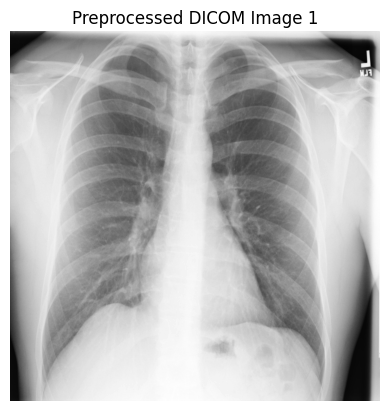

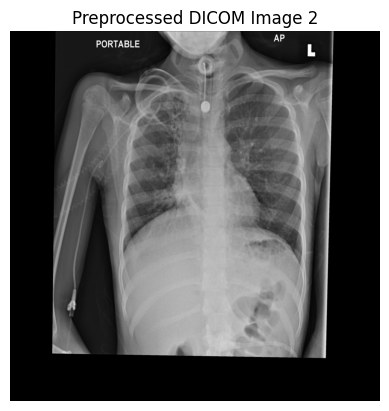

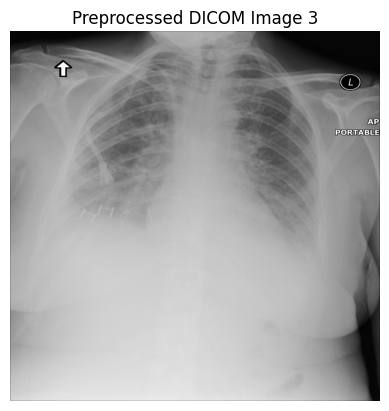

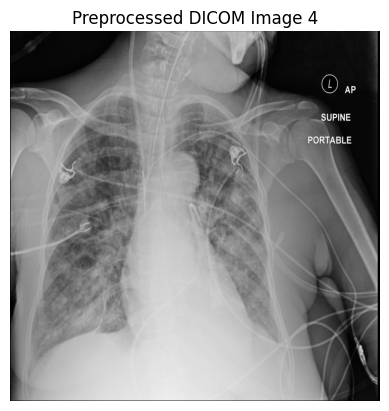

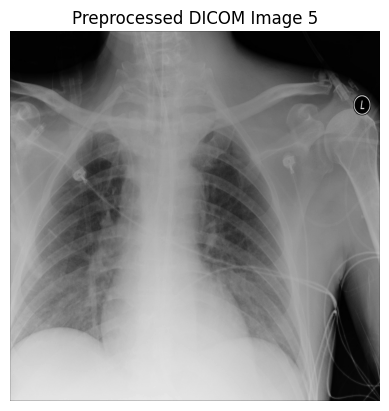

In [7]:
# Import necessary libraries
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to preprocess DICOM images
def preprocess_dicom_image(file_path):
    """
    This function reads a DICOM file, extracts the image data, and normalizes the pixel values.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    np.array: Preprocessed image data
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract image data as a numpy array
    image_data = dicom_file.pixel_array
    
    # Normalize the pixel values to the range 0-1
    image_data = image_data / np.max(image_data)
    
    return image_data

# Directory containing DICOM files
dicom_dir = "dicom_files"

# List all DICOM files in the directory
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.dcm')]

# Preprocess and display the first 5 DICOM images
for i, dicom_file in enumerate(dicom_files[:5]):
    # Preprocess the DICOM image
    preprocessed_image = preprocess_dicom_image(dicom_file)
    
    # Display the preprocessed image
    plt.figure()
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title(f'Preprocessed DICOM Image {i+1}')
    plt.axis('off')
    plt.show()

## Metadata Extraction and Exploration


In [5]:
# Function to extract patient gender from DICOM metadata
def extract_patient_gender(file_path):
    """
    This function reads a DICOM file and extracts the patient's gender from the metadata.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    str: Patient's gender (if available)
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract patient gender from metadata (if available)
    if 'PatientSex' in dicom_file:
        return dicom_file.PatientSex
    else:
        return "Unknown"

# List to store patient genders
patient_genders = []

# Extract patient gender from each DICOM file
for dicom_file in dicom_files:
    gender = extract_patient_gender(dicom_file)
    patient_genders.append(gender)

# Display the extracted patient genders
for i, gender in enumerate(patient_genders[:5]):
    print(f'Patient Gender for Image {i+1}: {gender}')


Patient Gender for Image 1: M
Patient Gender for Image 2: F
Patient Gender for Image 3: F
Patient Gender for Image 4: F
Patient Gender for Image 5: M


In [8]:
import pandas as pd

# List to store patient metadata
patient_metadata = []

# Extract metadata from each DICOM file
for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    metadata = {
        "File": dicom_file,
        "PatientID": dicom_data.PatientID if 'PatientID' in dicom_data else "Unknown",
        "PatientSex": dicom_data.PatientSex if 'PatientSex' in dicom_data else "Unknown",
        "PatientAge": dicom_data.PatientAge if 'PatientAge' in dicom_data else "Unknown",
    }
    patient_metadata.append(metadata)

# Convert to pandas DataFrame
metadata_df = pd.DataFrame(patient_metadata)

# Display the first 5 rows of the DataFrame
metadata_df.head(20)


,File,PatientID,PatientSex,PatientAge
0,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,17d405a3-a0d2-4901-b33a-63906aa48d9f,M,38
1,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,8ab1ffda-8b65-4914-95d6-2e549e328666,F,10
2,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,bfef51d3-6541-4792-bac1-d21d41ee60fd,F,50
3,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,d19d956f-4ddd-4688-81ff-909c85e0e2d9,F,68
4,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,cf71a760-f693-4ccf-acd4-a41ff4845a5f,M,65
5,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,3d911758-b2f0-4dff-8165-80c129ffa134,F,45
6,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,bf8b1e5d-7ae8-4f5b-a387-8e0bb40733f1,F,53
7,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,10520fab-17f0-4b86-ad5e-e4630ee6fca9,M,55
8,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,22e25a79-59b2-4e0c-88f3-6baba20c016e,F,26
9,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,969a87e0-de36-4038-931f-6daae9027975,M,63


In [9]:
# Function to list all metadata fields in a DICOM file
def list_dicom_metadata(file_path):
    """
    This function reads a DICOM file and lists all metadata fields.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    list: List of all metadata fields
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # List all metadata fields
    metadata_fields = dicom_file.dir()
    
    return metadata_fields

# Choose one DICOM file to explore
dicom_file_to_explore = dicom_files[0]

# Get all metadata fields
metadata_fields = list_dicom_metadata(dicom_file_to_explore)

# Display the total number of metadata fields and list them
print(f'Total metadata fields: {len(metadata_fields)}')
print('Metadata fields:')
for field in metadata_fields:
    print(field)


Total metadata fields: 35
Metadata fields:
AccessionNumber
BitsAllocated
BitsStored
BodyPartExamined
Columns
ConversionType
HighBit
InstanceNumber
LossyImageCompression
LossyImageCompressionMethod
Modality
PatientAge
PatientBirthDate
PatientID
PatientName
PatientOrientation
PatientSex
PhotometricInterpretation
PixelData
PixelRepresentation
PixelSpacing
ReferringPhysicianName
Rows
SOPClassUID
SOPInstanceUID
SamplesPerPixel
SeriesDescription
SeriesInstanceUID
SeriesNumber
SpecificCharacterSet
StudyDate
StudyID
StudyInstanceUID
StudyTime
ViewPosition


In [10]:
# Set to store unique metadata fields
unique_metadata_fields = set()

# Extract metadata fields from each DICOM file
for dicom_file in dicom_files:
    metadata_fields = list_dicom_metadata(dicom_file)
    unique_metadata_fields.update(metadata_fields)

# Display the total number of unique metadata fields and list them
print(f'Total unique metadata fields across all files: {len(unique_metadata_fields)}')
print('Unique metadata fields:')
for field in unique_metadata_fields:
    print(field)


Total unique metadata fields across all files: 35
Unique metadata fields:
HighBit
InstanceNumber
PixelRepresentation
PatientName
PixelSpacing
SeriesDescription
SeriesInstanceUID
SeriesNumber
StudyInstanceUID
BitsAllocated
PatientID
AccessionNumber
PatientBirthDate
SOPInstanceUID
SOPClassUID
StudyID
BitsStored
Columns
ReferringPhysicianName
SamplesPerPixel
PixelData
Rows
PhotometricInterpretation
Modality
LossyImageCompressionMethod
ViewPosition
PatientSex
PatientAge
StudyDate
StudyTime
LossyImageCompression
ConversionType
BodyPartExamined
PatientOrientation
SpecificCharacterSet


In [41]:
list_dicom_metadata(dicom_files[0])

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [25]:
# Function to extract and display potential diagnostic metadata fields
def extract_diagnostic_info(file_path):
    """
    This function reads a DICOM file and extracts potential diagnostic information from metadata.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    dict: Dictionary containing potential diagnostic metadata fields and their values
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # List of potential diagnostic metadata fields
    potential_diagnostic_fields = [
        'StudyDescription', 'SeriesDescription', 'ProtocolName', 'ClinicalTrialProtocolID',
        'ClinicalTrialProtocolName', 'ClinicalTrialSiteID', 'ClinicalTrialSiteName'
    ]
    
    # Extract the values of potential diagnostic fields
    diagnostic_info = {}
    for field in potential_diagnostic_fields:
        if hasattr(dicom_file, field):
            diagnostic_info[field] = getattr(dicom_file, field)
        else:
            diagnostic_info[field] = 'Not Available'
    
    return diagnostic_info

# Choose one DICOM file to explore
dicom_file_to_explore = dicom_files[31]

# Extract and display potential diagnostic information
diagnostic_info = extract_diagnostic_info(dicom_file_to_explore)
print('Potential Diagnostic Information:')
for field, value in diagnostic_info.items():
    print(f'{field}: {value}')


Potential Diagnostic Information:
StudyDescription: Not Available
SeriesDescription: view: AP
ProtocolName: Not Available
ClinicalTrialProtocolID: Not Available
ClinicalTrialProtocolName: Not Available
ClinicalTrialSiteID: Not Available
ClinicalTrialSiteName: Not Available
